<a href="https://colab.research.google.com/github/ajmal92/datascience/blob/main/Jambotree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Jamboree Education - Linear Regression


Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


### How can you help here?

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.


### Problem Statment: Predict the chances of graduate admission based on the given features.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("/Users/ajmal.m/Downloads/Jamboree_Admission.txt")

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.shape

(500, 9)

### Data Cleaning

In [ ]:
# removing serial No
df = df.drop('Serial No.', axis=1)

In [ ]:
df.isna().value_counts()

GRE Score  TOEFL Score  University Rating  SOP    LOR    CGPA   Research  Chance of Admit 
False      False        False              False  False  False  False     False               500
dtype: int64

In [ ]:
df = df.rename(columns={'Chance of Admit ':'Chance of Admit'})

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
max_score_columns = {'GRE Score':340, 'TOEFL Score':240, 'University Rating':5, 'SOP':5, 'CGPA':10}
binary_columns = ('Research',)
range_columns = {'Chance of Admit':(0,1)}

In [ ]:
for i,v in max_score_columns.items():
    assert True not in df[i].apply(lambda x: x>v).value_counts(), f"validation failed at {i}"

In [ ]:
for k in binary_columns:
     assert False not in df[k].apply(lambda x: x in (0,1)).value_counts(), f"validation failed at {k}"

In [ ]:
for j,v in range_columns.items():
     assert False not in df[j].apply(lambda x: x>=v[0] and x<=v[1]).value_counts(), f"validation failed at {k}"

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
scaler = StandardScaler()


<Axes: >

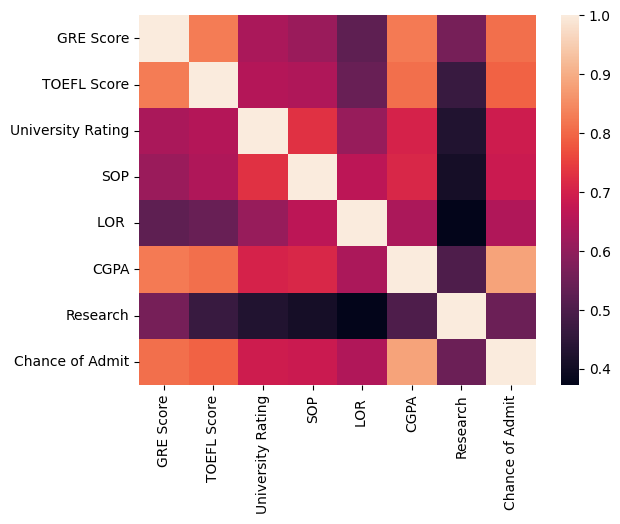

In [ ]:
sns.heatmap(df.corr())

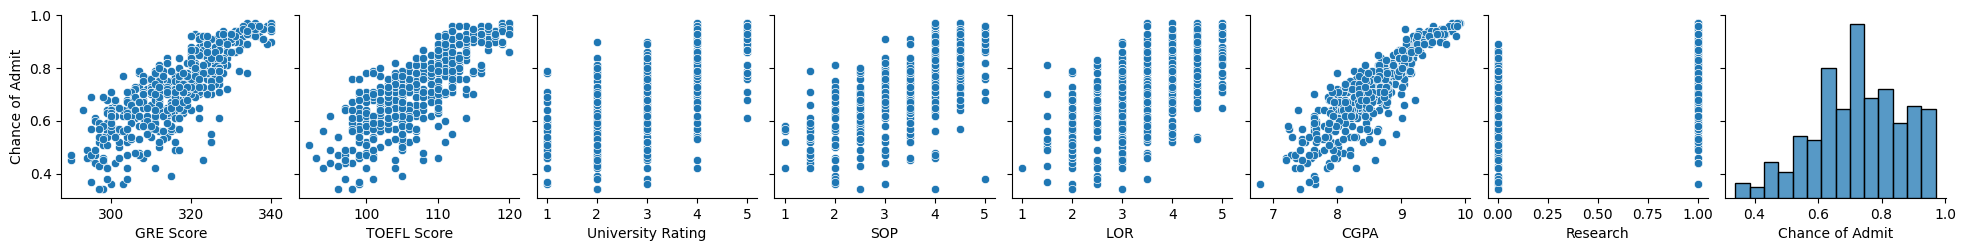

In [ ]:
sns.pairplot(df, y_vars=["Chance of Admit"])

- Chance of Admit has a positive correlation with TOEFL Score, CGPA and GRE Score
- From the pair plot, it can be inferred that GRE Score, TOEFL Score and CGPA are positively correlated with Chance of Admit

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### Univariate Analysis

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

<Axes: xlabel='GRE Score', ylabel='Count'>

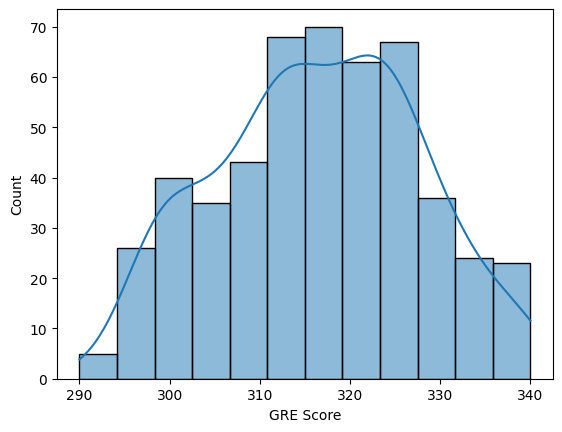

In [ ]:
sns.histplot(df['GRE Score'], kde=True)

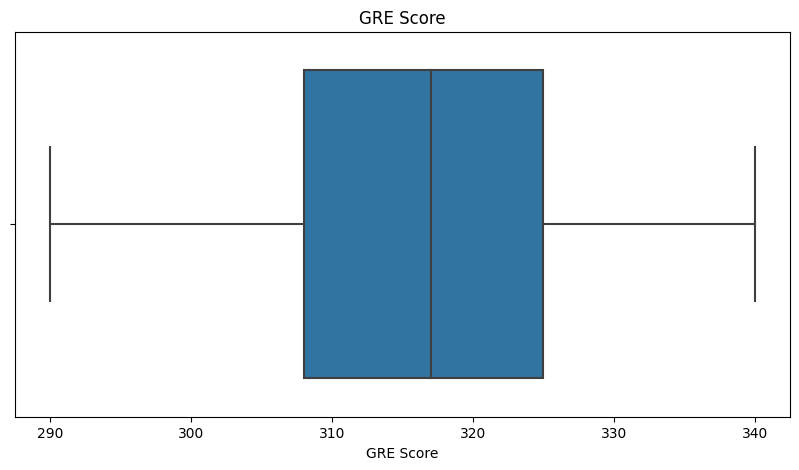

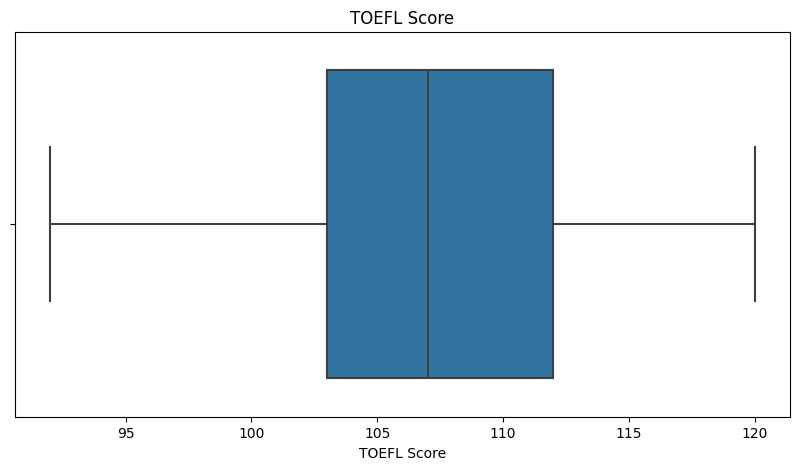

In [ ]:
for col in ['GRE Score', 'TOEFL Score']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, data=df)
    plt.title(col)
    plt.show()

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

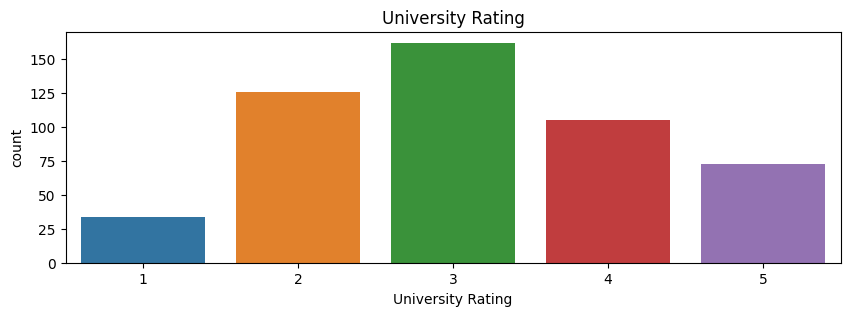

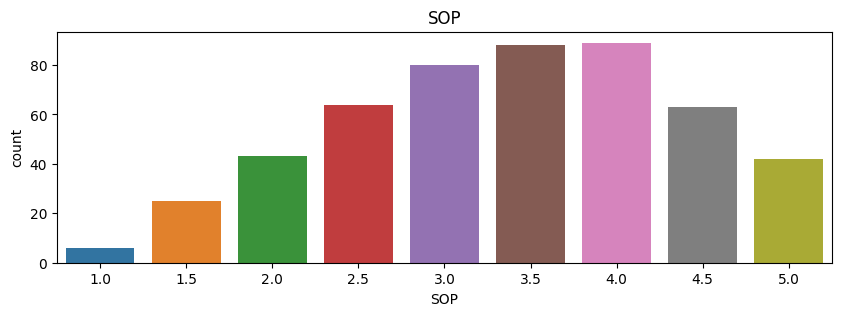

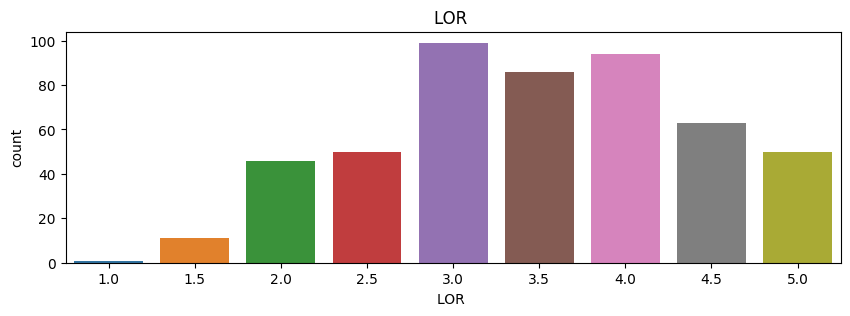

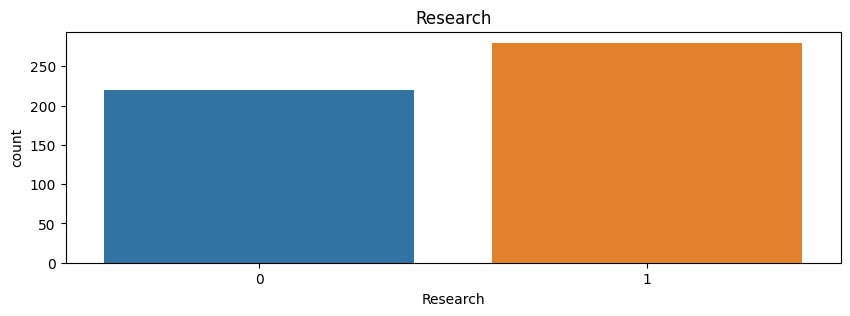

In [ ]:
for col in ('University Rating', 'SOP', 'LOR ',
       'Research'):
    plt.figure(figsize=(10,3))
    sns.countplot(data = df, x = col)
    plt.title(col)
    plt.show()

In [ ]:
X = df.drop('Chance of Admit', axis = 1)
Y = df['Chance of Admit']
X_scaled= scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

In [ ]:
len(X_train), len(X_test)

(350, 150)

<Axes: title={'center': 'Correlation between independent features'}>

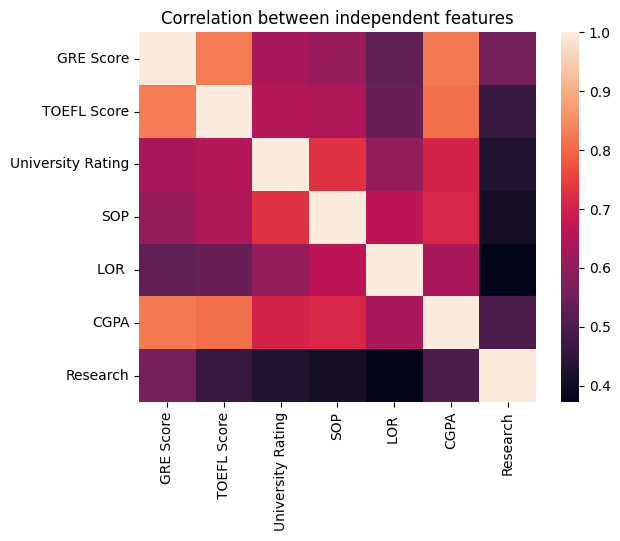

In [ ]:
plt.title('Correlation between independent features')
sns.heatmap(df_scaled.corr())

- There is a strong correlation between GRE Score and CGPA
- There is a strong correlation between GRE Score and TOEFL Score

In [ ]:
X_train.shape, X_test.shape

((350, 7), (150, 7))

## linear regression using sklearn

In [ ]:
def ols_stats(X_train,y_train):
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm)
    results = model.fit()
    print(results.summary())

In [ ]:
def adjusted_r2(r2, p, n):
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

In [ ]:
def linear_sklearn(X_train, y_train,X_test,y_test, model_name='linear', alpha=1.0):

    if model_name=='linear':
        lr = LinearRegression()
        print("Linear Regression using sklearn")
        print("-"*48)
    elif model_name == "lasso":
        lr = Lasso(alpha=alpha)
        print("Lasso Regression using sklearn")
        print("-"*48)
    elif model_name == "ridge":
        print("Ridge Regression using sklearn")
        print("-"*48)
        lr = Ridge(alpha=alpha)
    model_lr = lr.fit(X_train, y_train)
    y_pred = model_lr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, X_test.shape[1], X_test.shape[0])
    rmse = np.sqrt(np.sum((y_pred - y_test)**2))/len(X_test)
    mae = np.mean(np.abs(y_pred-y_test))

    print(f"R2_SCORE:{r2}")
    print(f"ADJUSTED R2_SCORE:{adj_r2}")
    print(f"TEST ROOT MEAN SQUARE ERROR:{rmse}")
    print(f"TEST MEAN ABSOLUTE ERROR:{mae}")
    print(f"Coefficients:{model_lr.coef_}")
    print(f"Intercepts:{model_lr.intercept_}")
    print("-"*48)
    return {'y_pred':y_pred,
            'r2_score':r2,
            'adjusted_r2_score': adjusted_r2(r2, X_test.shape[1], X_test.shape[0]),
            'rmse': rmse,
            'MAE': mae,
            'coefficient': model_lr.coef_,
            'intercept': model_lr.intercept_
           }

In [ ]:
r = linear_sklearn(X_train, y_train,X_test, y_test)
y_pred = r['y_pred']

Linear Regression using sklearn
------------------------------------------------
R2_SCORE:0.8297606381671517
ADJUSTED R2_SCORE:0.8213685569500395
TEST ROOT MEAN SQUARE ERROR:0.004727394817222394
TEST MEAN ABSOLUTE ERROR:0.040135212017190204
Coefficients:[0.0016369  0.00364947 0.00097778 0.00241911 0.01607144 0.12499607
 0.020956  ]
Intercepts:-1.3365923283927867
------------------------------------------------


In [ ]:
r2=linear_sklearn(X_train, y_train,X_test, y_test, model_name='ridge')

Ridge Regression using sklearn
------------------------------------------------
R2_SCORE:0.8304384185721854
ADJUSTED R2_SCORE:0.8220797490651804
TEST ROOT MEAN SQUARE ERROR:0.004717974753935006
TEST MEAN ABSOLUTE ERROR:0.040082476595300745
Coefficients:[0.00173157 0.00375374 0.00129483 0.00283152 0.01630118 0.12074391
 0.02070331]
Intercepts:-1.3443612387380148
------------------------------------------------


In [ ]:
r3 = linear_sklearn(X_train, y_train,X_test, y_test, model_name='lasso', alpha=0.01)

Lasso Regression using sklearn
------------------------------------------------
R2_SCORE:0.7867591453349431
ADJUSTED R2_SCORE:0.7762472722176516
TEST ROOT MEAN SQUARE ERROR:0.005290869998880079
TEST MEAN ABSOLUTE ERROR:0.047236576111364934
Coefficients:[0.00480033 0.00648813 0.00153223 0.00306182 0.01296098 0.03596472
 0.        ]
Intercepts:-1.8615097286021927
------------------------------------------------


In [ ]:
ols_stats(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     214.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.09e-121
Time:                        20:03:04   Log-Likelihood:                 484.99
No. Observations:                 350   AIC:                            -954.0
Df Residuals:                     342   BIC:                            -923.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3366      0.13

It can be deduced that r2 score, adjusted r2 score, coefficients and intercepts are similar in comparing linear regression in statsmodule and sklearn

In [ ]:
residual = y_pred - y_test

### test for normality - graphical

<Axes: xlabel='Chance of Admit', ylabel='Count'>

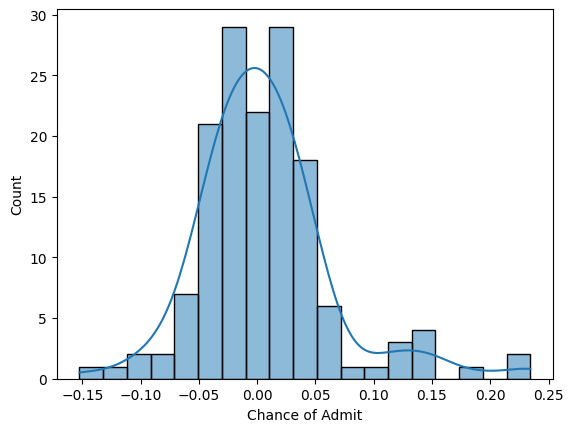

In [ ]:
sns.histplot(residual, kde=True)

### test for normality - shapiro test

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(residual)

ShapiroResult(statistic=0.9107934832572937, pvalue=5.647101275485511e-08)

Since, p-value is less than 0.05, it can be inferred than residual do not follow normal distribution

### Multi-Collineality Check

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_n = df.iloc[:,:-1]
while True:
    _df = pd.DataFrame()
    _df['feature'] = df_n.columns
    _df['VIF'] = [variance_inflation_factor(df_n,i) for i,v in enumerate(df_n.columns)]
    print("\n")
    print(_df)
    _df = _df[_df['VIF']>5]

    _col = _df.iloc[0]['feature'] if len(_df)>0 else None

    if _col:
        print("\n")
        print(f"dropping {_col} and re-calculating vif")
        df_n = df_n.drop(_col, axis=1)
    else:
        break



             feature          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4               LOR     30.911476
5               CGPA   950.817985
6           Research     2.869493


dropping GRE Score and re-calculating vif


             feature         VIF
0        TOEFL Score  639.741892
1  University Rating   19.884298
2                SOP   33.733613
3               LOR    30.631503
4               CGPA  728.778312
5           Research    2.863301


dropping TOEFL Score and re-calculating vif


             feature        VIF
0  University Rating  19.777410
1                SOP  33.625178
2               LOR   30.356252
3               CGPA  25.101796
4           Research   2.842227


dropping University Rating and re-calculating vif


    feature        VIF
0       SOP  25.742050
1      LOR   29.358881
2      CGPA  25.012564
3  Research   2.744550


dropping SOP and re-calculating vif




In [ ]:
df_n

,CGPA,Research
0,9.65,1
1,8.87,1
2,8.00,1
3,8.67,1
4,8.21,0
...,...,...
495,9.02,1
496,9.87,1
497,9.56,1
498,8.43,0


- From the above, CGPA and Research can be the only significant columns that can be used for training

Training linear models considering only the above two columns

In [ ]:
X = df[df_n.columns]
Y = df['Chance of Admit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

In [ ]:
res = linear_sklearn(X_train, y_train,X_test, y_test)

Linear Regression using sklearn
------------------------------------------------
R2_SCORE:0.805422675781713
ADJUSTED R2_SCORE:0.8027753652481309
TEST ROOT MEAN SQUARE ERROR:0.005054032110109218
TEST MEAN ABSOLUTE ERROR:0.04367514147967147
Coefficients:[0.19271787 0.03441606]
Intercepts:-0.94832783367659
------------------------------------------------


In [ ]:
r2=linear_sklearn(X_train, y_train,X_test, y_test, model_name='ridge')

Ridge Regression using sklearn
------------------------------------------------
R2_SCORE:0.8058125862906956
ADJUSTED R2_SCORE:0.8031705806619976
TEST ROOT MEAN SQUARE ERROR:0.005048965722094407
TEST MEAN ABSOLUTE ERROR:0.0436436345699149
Coefficients:[0.19093096 0.03506217]
Intercepts:-0.9334527532166722
------------------------------------------------


In [ ]:
r3=linear_sklearn(X_train, y_train,X_test, y_test, model_name='lasso', alpha=0.01)

Lasso Regression using sklearn
------------------------------------------------
R2_SCORE:0.7748903500831714
ADJUSTED R2_SCORE:0.7718276337577724
TEST ROOT MEAN SQUARE ERROR:0.005436118807001254
TEST MEAN ABSOLUTE ERROR:0.04907032639185188
Coefficients:[0.17761906 0.00277681]
Intercepts:-0.8019691199713838
------------------------------------------------


In [ ]:
ols_stats(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     633.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.66e-116
Time:                        20:03:06   Log-Likelihood:                 458.99
No. Observations:                 350   AIC:                            -912.0
Df Residuals:                     347   BIC:                            -900.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9483      0.055    -17.168      0.0

In [ ]:
residual = y_pred - y_test

<Axes: xlabel='Chance of Admit', ylabel='Count'>

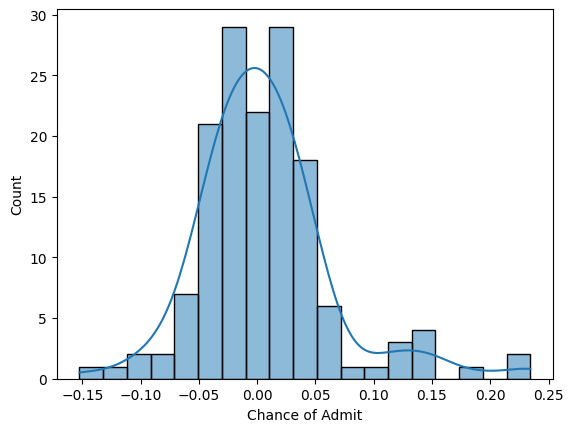

In [ ]:
sns.histplot(residual, kde=True)

In [ ]:
shapiro(residual)

ShapiroResult(statistic=0.9107934832572937, pvalue=5.647101275485511e-08)

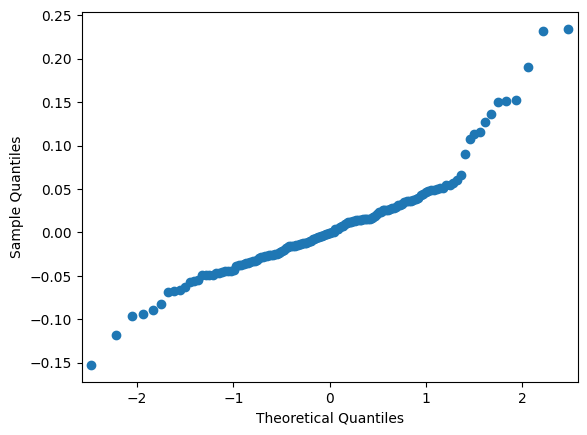

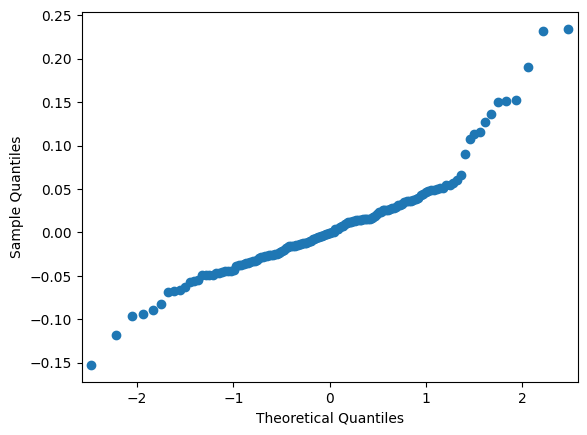

In [ ]:
sm.qqplot(residual)


- It can be deduced that residuals do not exactly form a normal distribution
- Shapiro test has resulted in rejecting the distribution as normal
- In qq-test, the points some what lie along a straight line

### Test for Homoscedasticity


<Axes: ylabel='Chance of Admit'>

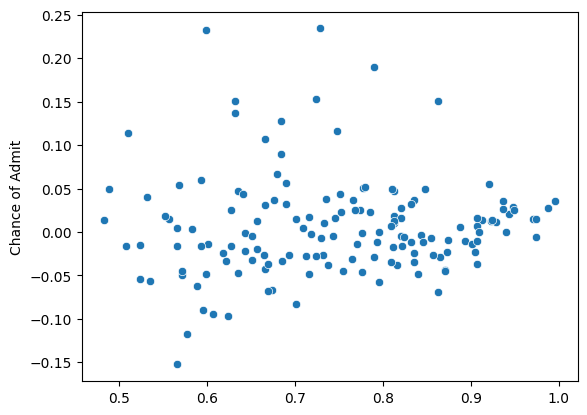

In [ ]:
sns.scatterplot(y=residual, x = res['y_pred'])

Since the plot is not creating a cone type shape / converging. Hence there is no homoscedasticity present in the data.



In [ ]:
np.round(np.mean(residual),3)

0.006

### Mean of Residuals
mean of residuals ~ 0

## Linearity of variables
From EDA, it can be inferred that independent variables have a linear relationship with target variable

### Insights and Recommendations

- Multicollinearity is present in the data.
- After removing collinear features there are only two variables which are important in making predictions for the target variables.
- Indepedent variables are linearly correlated with dependent variables.

### Recommendations
- CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.
- CGPA is the most important varibale in making the prediction for the Chance of Admit.
- Following are the final model results on the test data:
    - RMSE: 0.05
    - MAE: 0.04
    - R2_score: 0.805
    - Adjusted_R2: 0.803